## Title: Sentiment Analysis in Social Media Text using Neural Network <a class="anchor" id="intro"></a>

#### Description:
This notebook contain plots of results of all experimental result.

### Table of Content

* [Introduction](#intro)
    * [Environment Set-up](#setup)
    * [Load dataset](#load_dataset)
* [Bar Plot - Neural Network + Text Vectorization](#nn_text_vect)
* [Bar Plot - Neural Network + Text Vectorization](#nn_text_vect_no_emoji)
* [Bar Plot - Comparison of Test Accuracy and Macro F1-Score in Neural Network + Text Vectorization](#nn_text_vect_acc_f1)
* [Line Graph - Comparison of Test Accuracy and Macro F1-Score in Neural Network + Text Vectorization](#line_nn_text_vect_acc_f1)
* [Bar Plot - Comparison of Test Accuracy and Macro F1-Score in Neural Network + Word2Vec](#nn_w2v_acc_f1)
* [Line Graph - Comparison of Test Accuracy and Macro F1-Score in Neural Network + Word2Vec](#nn_w2v_acc_f1_line)

#### Set-up Environment <a class="anchor" id="setup"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_style("dark")

#### Load dataset <a class="anchor" id="load_dataset"></a>

In [2]:
texts = pd.read_csv('../../ml results.csv')
df = pd.DataFrame(texts)
df

,name,dataset,type,freq,value
0,nb,Without emoji,bow,Unigram,0.7233
1,nb,With emoji,bow,Unigram,0.7107
2,nb,Without emoji,bow,Bigram,0.7296
3,nb,With emoji,bow,Bigram,0.7107
4,nb,Without emoji,tfidf,Unigram,0.7296
5,nb,With emoji,tfidf,Unigram,0.7232
6,nb,Without emoji,tfidf,Bigram,0.7296
7,nb,With emoji,tfidf,Bigram,0.7233
8,lr,Without emoji,bow,Unigram,0.7296
9,lr,With emoji,bow,Unigram,0.7421


View all columns in result file

In [3]:
df.columns

Index(['name', 'dataset', 'type', 'freq', 'value'], dtype='object')

Process context of file for easy plotting

In [4]:
df['name'] = df['name'] + ' ' + df.freq
df

,name,dataset,type,freq,value
0,nb Unigram,Without emoji,bow,Unigram,0.7233
1,nb Unigram,With emoji,bow,Unigram,0.7107
2,nb Bigram,Without emoji,bow,Bigram,0.7296
3,nb Bigram,With emoji,bow,Bigram,0.7107
4,nb Unigram,Without emoji,tfidf,Unigram,0.7296
5,nb Unigram,With emoji,tfidf,Unigram,0.7232
6,nb Bigram,Without emoji,tfidf,Bigram,0.7296
7,nb Bigram,With emoji,tfidf,Bigram,0.7233
8,lr Unigram,Without emoji,bow,Unigram,0.7296
9,lr Unigram,With emoji,bow,Unigram,0.7421


Delete unwanted column

In [5]:
del df['freq']

filter values needed only

In [6]:
list(df[(df.dataset == 'With emoji') & (df.value == df.value.max())].max())

['lr Unigram', 'With emoji', 'bow', 0.7421]

In [7]:
df_highest = pd.DataFrame(columns=df.columns)
df_find = df[(df.dataset == 'Without emoji')]
df_highest = df_highest.append(df_find[df_find.value == df_find.value.max()], ignore_index= True)
df_find = df[(df.dataset == 'With emoji')]
df_highest = df_highest.append(df_find[df_find.value == df_find.value.max()], ignore_index= True)
df_highest

,name,dataset,type,value
0,lr Unigram,Without emoji,tfidf,0.7421
1,lr Bigram,Without emoji,tfidf,0.7421
2,lr Unigram,With emoji,bow,0.7421
3,lr Bigram,With emoji,bow,0.7421


In [8]:
texts = pd.read_csv('../../results text vect.csv')
df = pd.DataFrame(texts)
df

,name,dataset,type,value
0,One Layer RNN Neural Network + Text Vectorization,Without emoji,test accuracy,0.6566
1,One Layer LSTM Neural Network + Text Vectoriza...,Without emoji,test accuracy,0.7183
2,One Layer biLSTM Neural Network + Text Vectori...,Without emoji,test accuracy,0.6970
3,Two Layer biLSTM Neural Network + Text Vectori...,Without emoji,test accuracy,0.7155
4,One Layer RNN Neural Network + Text Vectorization,With emoji,test accuracy,0.7155
5,One Layer LSTM Neural Network + Text Vectoriza...,With emoji,test accuracy,0.7239
6,One Layer biLSTM Neural Network + Text Vectori...,With emoji,test accuracy,0.7340
7,Two Layer biLSTM Neural Network + Text Vectori...,With emoji,test accuracy,0.7508
8,One Layer RNN Neural Network + Text Vectorization,Without emoji,macro f1,0.5793
9,One Layer LSTM Neural Network + Text Vectoriza...,Without emoji,macro f1,0.6674


In [9]:
def name_only(in_text):
    in_text = re.sub(' Neural Network', '', in_text)
    new_text = re.split('\+', in_text)
    return new_text[0]

df.name = df.name.apply(name_only)
df

,name,dataset,type,value
0,One Layer RNN,Without emoji,test accuracy,0.6566
1,One Layer LSTM,Without emoji,test accuracy,0.7183
2,One Layer biLSTM,Without emoji,test accuracy,0.6970
3,Two Layer biLSTM,Without emoji,test accuracy,0.7155
4,One Layer RNN,With emoji,test accuracy,0.7155
5,One Layer LSTM,With emoji,test accuracy,0.7239
6,One Layer biLSTM,With emoji,test accuracy,0.7340
7,Two Layer biLSTM,With emoji,test accuracy,0.7508
8,One Layer RNN,Without emoji,macro f1,0.5793
9,One Layer LSTM,Without emoji,macro f1,0.6674


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     24 non-null     object 
 1   dataset  24 non-null     object 
 2   type     24 non-null     object 
 3   value    24 non-null     float64
dtypes: float64(1), object(3)
memory usage: 896.0+ bytes


#### Bar Plot - Neural Network + Text Vectorization + Emoji <a class="anchor" id="nn_text_vect"></a>

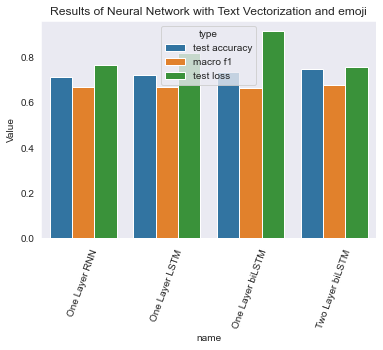

In [11]:
sns.barplot(x='name', y='value', hue='type', data=df[df.dataset == 'With emoji'])
plt.xticks(rotation=70)
plt.ylabel('Value')
plt.title('Results of Neural Network with Text Vectorization and emoji');

#### Bar Plot - Neural Network + Text Vectorization <a class="anchor" id="nn_text_vect"></a>

Text(0.5, 1.0, 'Results of Neural Network with Text Vectorization without emoji')

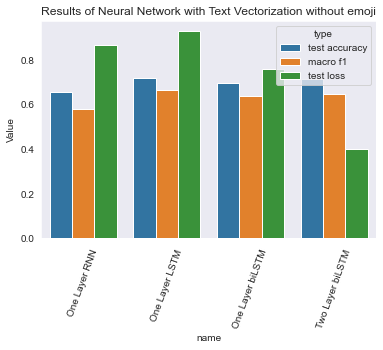

In [12]:
sns.barplot(x='name', y='value', hue='type', data=df[df.dataset == 'Without emoji'])
plt.xticks(rotation=70)
plt.ylabel('Value')
plt.title('Results of Neural Network with Text Vectorization without emoji')

#### Bar Plot - Comparison of Test Accuracy and Macro F1-Score in Neural Network + Text Vectorization <a class="anchor" id="nn_text_vect_acc_f1"></a>

Text(0.5, 1.0, 'Results of Neural Network with Text Vectorization in Macro F1-Score')

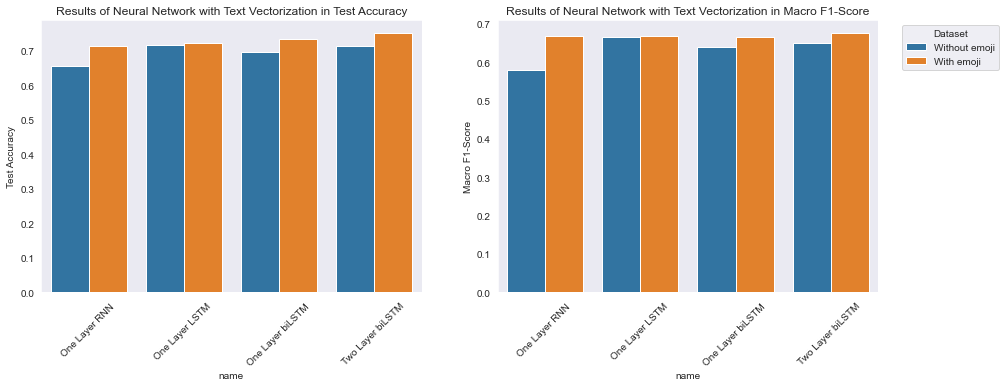

In [13]:
fig, ax =plt.subplots(1,2, figsize=(15, 5))

sns.barplot(x='name', y='value', hue='dataset', data=df[df.type == 'test accuracy'], ax=ax[0])
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_ylabel('Test Accuracy')
#ax=ax[0].legend(loc='upper left')
ax[0].get_legend().remove()
ax[0].set_title('Results of Neural Network with Text Vectorization in Test Accuracy')

sns.barplot(x='name', y='value', hue='dataset', data=df[df.type == 'macro f1'])
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_ylabel('Macro F1-Score')
ax[1].legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
ax[1].set_title('Results of Neural Network with Text Vectorization in Macro F1-Score')

Text(0.5, 1.0, 'Results of Neural Network with Text Vectorization in Macro F1-Score')

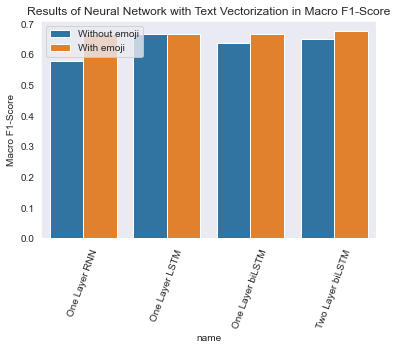

In [14]:
sns.barplot(x='name', y='value', hue='dataset', data=df[df.type == 'macro f1'])
plt.xticks(rotation=70)
plt.ylabel('Macro F1-Score')
plt.legend(loc='upper left')
plt.title('Results of Neural Network with Text Vectorization in Macro F1-Score')

Text(0.5, 1.0, 'Results of Neural Network with Text Vectorization in Macro F1-Score')

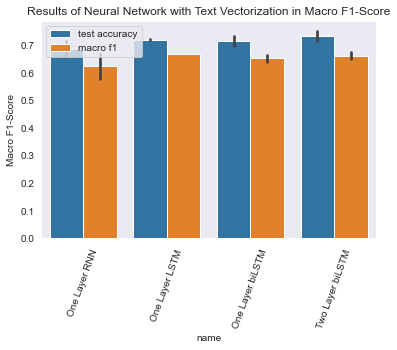

In [15]:
sns.barplot(x='name', y='value', hue='type', data=df[df.type != 'test loss'])
plt.xticks(rotation=70)
plt.ylabel('Macro F1-Score')
plt.legend(loc='upper left')
plt.title('Results of Neural Network with Text Vectorization in Macro F1-Score')

#### Line Graph - Comparison of Test Accuracy and Macro F1-Score in Neural Network + Text Vectorization <a class="anchor" id="line_nn_text_vect_acc_f1"></a>

Text(0.5, 1.0, 'Relationship of Test Accuracy and Macro F1-Score in Text Vectorization with Emoji')

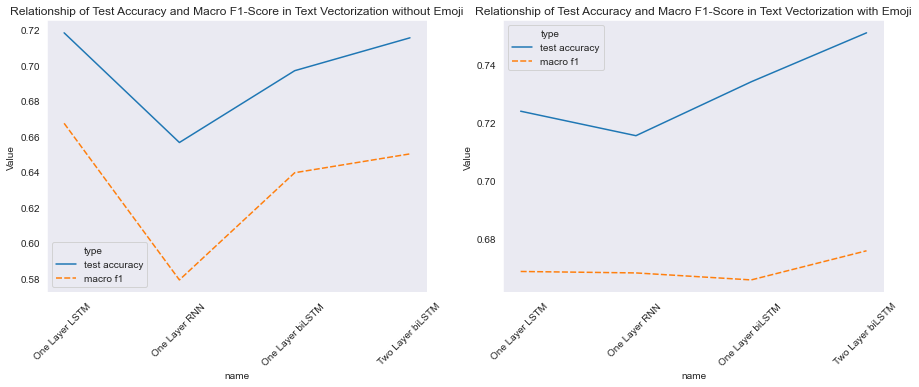

In [16]:
fig, ax =plt.subplots(1,2, figsize=(15, 5))


sns.lineplot(data=df[(df.type != 'test loss') & (df.dataset == 'Without emoji')], 
             x="name", y="value", hue="type", style='type',  ax=ax[0])
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_ylabel('Value')
ax[0].set_title('Relationship of Test Accuracy and Macro F1-Score in Text Vectorization without Emoji')


sns.lineplot(data=df[(df.type != 'test loss') & (df.dataset == 'With emoji')], 
             x="name", y="value", hue="type", style='type',  ax=ax[1])
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_ylabel('Value')
ax[1].set_title('Relationship of Test Accuracy and Macro F1-Score in Text Vectorization with Emoji')

In [17]:
df_find = df[(df.dataset == 'Without emoji') & (df.type == 'test accuracy')]
df_highest = df_highest.append(df_find[df_find.value == df_find.value.max()], ignore_index= True)
df_find = df[(df.dataset == 'With emoji') & (df.type == 'test accuracy')]
df_highest = df_highest.append(df_find[df_find.value == df_find.value.max()], ignore_index= True)
df_highest

,name,dataset,type,value
0,lr Unigram,Without emoji,tfidf,0.7421
1,lr Bigram,Without emoji,tfidf,0.7421
2,lr Unigram,With emoji,bow,0.7421
3,lr Bigram,With emoji,bow,0.7421
4,One Layer LSTM,Without emoji,test accuracy,0.7183
5,Two Layer biLSTM,With emoji,test accuracy,0.7508


In [18]:
texts = pd.read_csv('../../results word2vec.csv')
df = pd.DataFrame(texts)
df

,name,dataset,type,value
0,One Layer RNN Neural Network + Word2Vec,without emoji,test accuracy,0.7239
1,One Layer LSTM Neural Network + Word2Vec,without emoji,test accuracy,0.7222
2,Two Layer biLSTM Neural Network + Word2Vec,without emoji,test accuracy,0.7256
3,Two Layer biLSTM Neural Network + Word2Vec + D...,without emoji,test accuracy,0.7424
4,Two Layer biLSTM Neural Network + Word2Vec + D...,without emoji,test accuracy,0.7374
5,One Layer RNN Neural Network + Word2Vec,without emoji,macro f1,0.6115
6,One Layer LSTM Neural Network + Word2Vec,without emoji,macro f1,0.6405
7,Two Layer biLSTM Neural Network + Word2Vec,without emoji,macro f1,0.6603
8,Two Layer biLSTM Neural Network + Word2Vec + D...,without emoji,macro f1,0.6761
9,Two Layer biLSTM Neural Network + Word2Vec + D...,without emoji,macro f1,0.6605


In [19]:

def name_only_2(in_text):
    in_text = re.sub('Word2Vec', '', in_text)
    in_text = re.sub('Neural Network', '', in_text)
    in_text = re.sub('Dropout', 'D', in_text)
    in_text = re.sub('Batch Normalize', 'B', in_text)
    new_text = re.split('\+', in_text)
    str_list = list(filter(None, new_text))
    str_list = [x.strip(' ') for x in str_list]
    
    new_text = '+'.join(str_list)
    new_text = re.sub('(\+)$', '', new_text)
    new_text = re.compile(r'(\+)\1{1,}', re.IGNORECASE).sub(r'\1', new_text)
    return new_text


df.name = df.name.apply(name_only_2)
df

,name,dataset,type,value
0,One Layer RNN,without emoji,test accuracy,0.7239
1,One Layer LSTM,without emoji,test accuracy,0.7222
2,Two Layer biLSTM,without emoji,test accuracy,0.7256
3,Two Layer biLSTM+D,without emoji,test accuracy,0.7424
4,Two Layer biLSTM+D+B,without emoji,test accuracy,0.7374
5,One Layer RNN,without emoji,macro f1,0.6115
6,One Layer LSTM,without emoji,macro f1,0.6405
7,Two Layer biLSTM,without emoji,macro f1,0.6603
8,Two Layer biLSTM+D,without emoji,macro f1,0.6761
9,Two Layer biLSTM+D+B,without emoji,macro f1,0.6605


#### Bar Plot - Comparison of Test Accuracy and Macro F1-Score in Neural Network + Word2Vec <a class="anchor" id="nn_w2v_acc_f1"></a>

Text(0.5, 1.0, 'Results of Neural Network with Word2Vec and emoji')

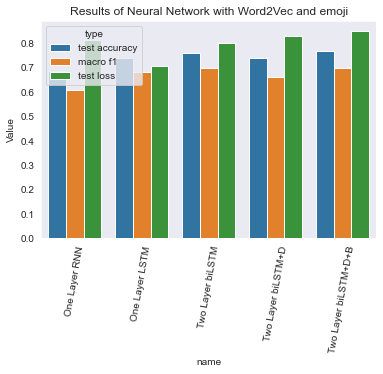

In [20]:
sns.barplot(x='name', y='value', hue='type', data=df[df.dataset == 'with emoji'])
plt.xticks(rotation=80)
plt.ylabel('Value')
plt.title('Results of Neural Network with Word2Vec and emoji')

Text(0.5, 1.0, 'Results of Neural Network with Word2Vec without emoji')

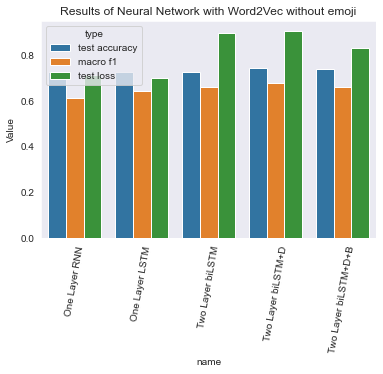

In [21]:
sns.barplot(x='name', y='value', hue='type', data=df[df.dataset == 'without emoji'])
plt.xticks(rotation=80)
plt.ylabel('Value')
plt.title('Results of Neural Network with Word2Vec without emoji')

Text(0.5, 1.0, 'Results of Neural Network with Word2Vec in Macro F1-Score')

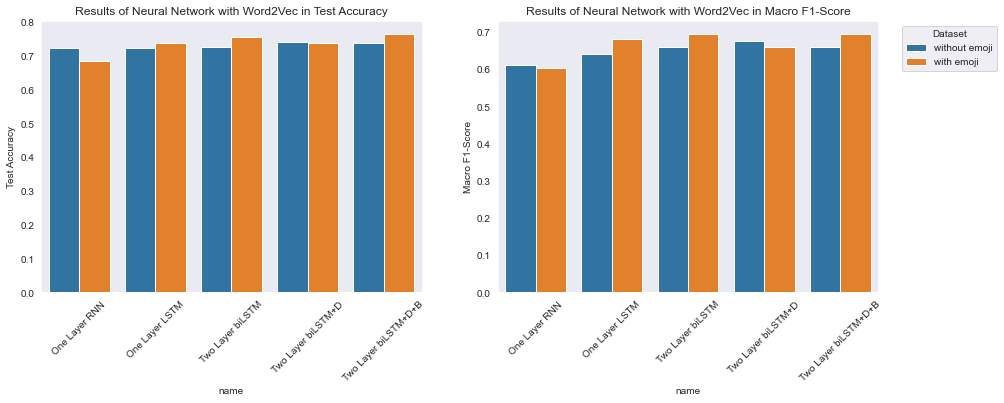

In [22]:
fig, ax =plt.subplots(1,2, figsize=(15, 5))

sns.barplot(x='name', y='value', hue='dataset', data=df[df.type == 'test accuracy'], ax=ax[0])
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_ylabel('Test Accuracy')
#ax=ax[0].legend(loc='upper left')
ax[0].get_legend().remove()
ax[0].set_title('Results of Neural Network with Word2Vec in Test Accuracy')

sns.barplot(x='name', y='value', hue='dataset', data=df[df.type == 'macro f1'], ax=ax[1])
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_ylabel('Macro F1-Score')
ax[1].legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
ax[1].set_title('Results of Neural Network with Word2Vec in Macro F1-Score')

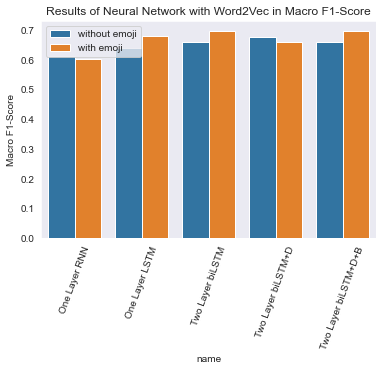

In [23]:
sns.barplot(x='name', y='value', hue='dataset', data=df[df.type == 'macro f1'])
plt.xticks(rotation=70)
plt.ylabel('Macro F1-Score')
plt.legend(loc='upper left')
plt.title('Results of Neural Network with Word2Vec in Macro F1-Score')

#### Line Graph - Comparison of Test Accuracy and Macro F1-Score in Neural Network + Word2Vec <a class="anchor" id="nn_w2v_acc_f1_line"></a>

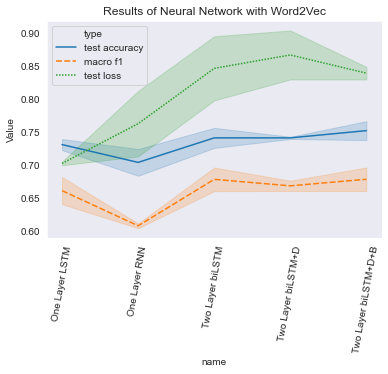

In [24]:
sns.lineplot(data=df, x="name", y="value", hue="type", style='type')
plt.xticks(rotation=80)
plt.ylabel('Value')
plt.title('Results of Neural Network with Word2Vec');

In [28]:
df_find = df[(df.dataset == 'without emoji') & (df.type == 'test accuracy')]
df_highest = df_highest.append(df_find[df_find.value == df_find.value.max()], ignore_index= True)
df_find = df[(df.dataset == 'with emoji') & (df.type == 'test accuracy')]
df_highest = df_highest.append(df_find[df_find.value == df_find.value.max()], ignore_index= True)
df_highest

,name,dataset,type,value
0,lr Unigram,Without emoji,tfidf,0.7421
1,lr Bigram,Without emoji,tfidf,0.7421
2,lr Unigram,With emoji,bow,0.7421
3,lr Bigram,With emoji,bow,0.7421
4,One Layer LSTM,Without emoji,test accuracy,0.7183
5,Two Layer biLSTM,With emoji,test accuracy,0.7508
6,Two Layer biLSTM+D,without emoji,test accuracy,0.7424
7,Two Layer biLSTM+D+B,with emoji,test accuracy,0.7660


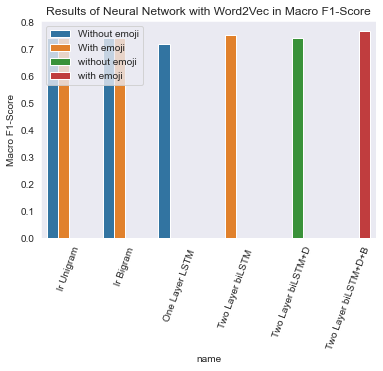

In [29]:
sns.barplot(x='name', y='value', hue='dataset', data=df_highest)
plt.xticks(rotation=70)
plt.ylabel('Macro F1-Score')
plt.legend(loc='upper left')
plt.title('Results of Neural Network with Word2Vec in Macro F1-Score');